In [1]:
from array import array
import math
import numpy as np
from scipy.fftpack import fft
import random

In [2]:
fs = 0.2
phis = math.pi/4.0
tseries = 50.0

random.seed(1)

In [3]:
N_max = 513  #power of 2 plus 1
N_start = 32 #power of 2
#N_max = 513  #power of 2 plus 1
#N_start = 460 #power of 2
btime = np.zeros(N_max)
ptime = np.zeros(N_max)
time_ratio = np.zeros(N_max)
Npoints = np.zeros(N_max)

for N in range(N_start,N_max):
    
    Npoints[N] = N

    tau = tseries/N
    t = np.zeros(N)
    y = np.zeros(N)
    f = np.zeros(N)

    ytReal = np.zeros(N)
    ytImag = np.zeros(N)

    yfftReal = np.zeros(N)
    yfftImag = np.zeros(N)

    power = np.zeros(N)
    powerfft = np.zeros(N)
    
    for i in range(N):
        t[i]=i*tau
        y[i]=(math.sin(2.0*math.pi*t[i]*fs+phis))
        f[i]=i/(N*tau)
    
    from timeit import default_timer as timer

    start = timer()

    twopiN=-2.0*math.pi/N
    epsilon = 0.001
    for k in range(N):
        ytReal[k]=epsilon
        ytImag[k]=epsilon
        for j in range(N):
            ytReal[k] = ytReal[k] + 1.0/N*y[j]*math.cos(twopiN*j*k)
            ytImag[k] = ytImag[k] + 1.0/N*y[j]*math.sin(twopiN*j*k)   
        power[k]=2*(ytReal[k]**2+ytImag[k]**2)
    
    end = timer()
    btime[N] = end-start
    #print ("Brash: ",btime[N])
        
    start = timer()
    yfft = fft(y)
    yfftReal = 1.0/N*yfft.real
    yfftImag = 1.0/N*yfft.imag
    powerfft = 2.0/(N*N)*abs(yfft)**2
    end = timer()
    ptime[N]=end-start
    time_ratio[N] = btime[N]/ptime[N]
    
    #print ("Python: ",ptime[N])
    print("Ratio = ",N,btime[N]/ptime[N])

Ratio =  32 13.286830101435795
Ratio =  33 30.123358307049084
Ratio =  34 67.14886882339421
Ratio =  35 63.490047939750156
Ratio =  36 99.91509769082842
Ratio =  37 52.7965072287823
Ratio =  38 57.97471517085808
Ratio =  39 65.07840776414048
Ratio =  40 84.43756253145023
Ratio =  41 67.85838188556308
Ratio =  42 114.2868357926614
Ratio =  43 80.3338727909225
Ratio =  44 96.20524823030978
Ratio =  45 100.40327027541254
Ratio =  46 133.87190926270569
Ratio =  47 107.66098039190615
Ratio =  48 119.06789524732088
Ratio =  49 124.42840556053883
Ratio =  50 129.6449682685253
Ratio =  51 140.0768187421948
Ratio =  52 126.18924511516971
Ratio =  53 134.17229274312623
Ratio =  54 146.4227616976057
Ratio =  55 159.56879762285047
Ratio =  56 154.69589105135682
Ratio =  57 155.552783794689
Ratio =  58 180.52310455711472
Ratio =  59 178.39482873029598
Ratio =  60 189.09343702468112
Ratio =  61 155.6972600727315
Ratio =  62 136.93803716793406
Ratio =  63 182.04070379450192
Ratio =  64 175.2477552777

Ratio =  295 2196.7840366777764
Ratio =  296 2166.73103013154
Ratio =  297 2410.958574175397
Ratio =  298 1925.7219865254685
Ratio =  299 2369.2186973647936
Ratio =  300 2458.369699640513
Ratio =  301 1558.8405835936865
Ratio =  302 1876.6198701880944
Ratio =  303 2163.8484672794034
Ratio =  304 2605.9460482396407
Ratio =  305 2402.528880568075
Ratio =  306 2368.4922218958873
Ratio =  307 1296.4192119649804
Ratio =  308 2406.3216759112797
Ratio =  309 2165.2767646383977
Ratio =  310 1252.706262280784
Ratio =  311 1319.0302635799806
Ratio =  312 2483.8225122356603
Ratio =  313 1256.73178529078
Ratio =  314 2061.524087173023
Ratio =  315 2653.3041196288655
Ratio =  316 2429.353157401895
Ratio =  317 1338.4366576282296
Ratio =  318 2346.8158459290908
Ratio =  319 2613.9566445971604
Ratio =  320 2685.0600707602125
Ratio =  321 2486.34802197002
Ratio =  322 2659.5633856658574
Ratio =  323 2693.604102451674
Ratio =  324 2878.5449711062506
Ratio =  325 2689.7074213360647
Ratio =  326 2155.534

Welcome to JupyROOT 6.18/00


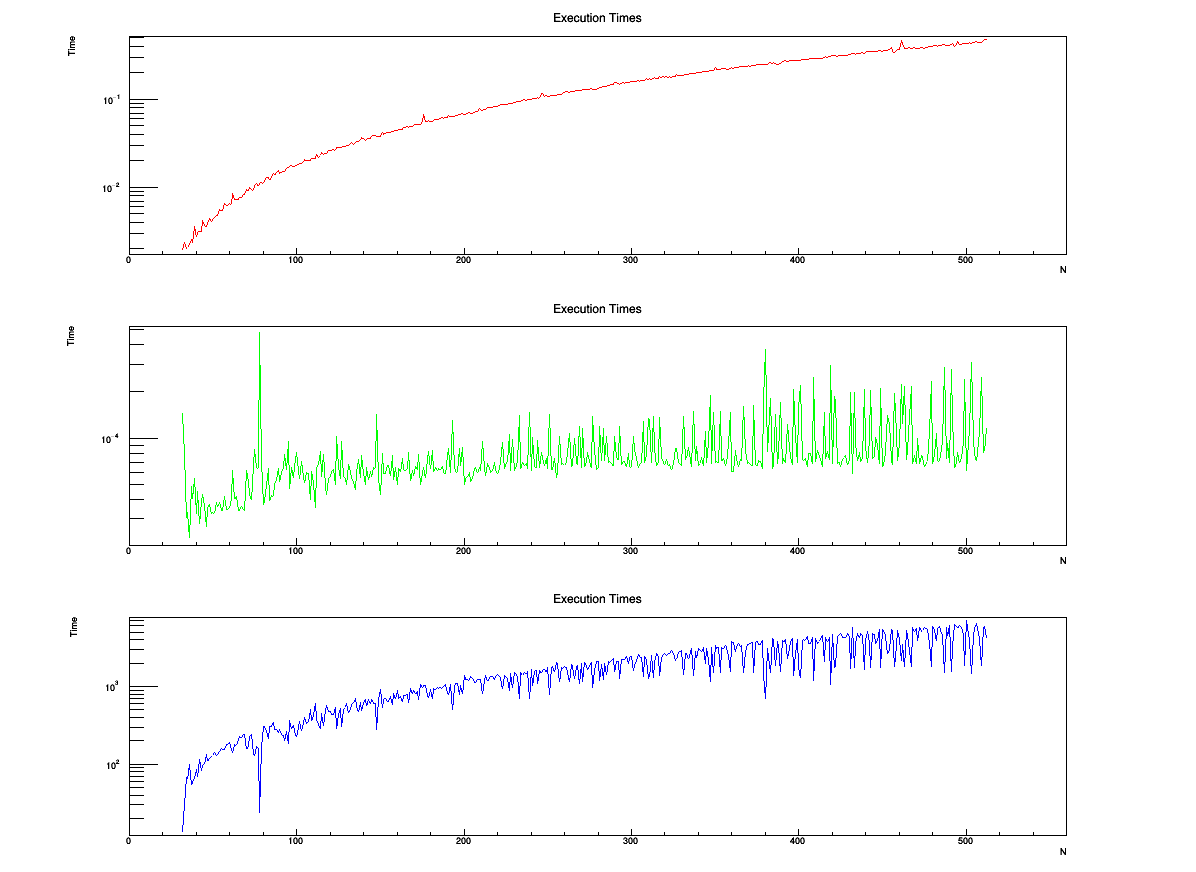

In [4]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1
from ROOT import gStyle, gPad

gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Fourier Transform', 200, 10, 1200, 900 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(1,3)

c1.cd(1)
gPad.SetLogy()
gr = TGraph(N_max-N_start,Npoints[N_start:N_max],btime[N_start:N_max])
gr2 = TGraph(N_max-N_start,Npoints[N_start:N_max],ptime[N_start:N_max])
gr3 = TGraph(N_max-N_start,Npoints[N_start:N_max],time_ratio[N_start:N_max])
gr.SetMarkerStyle(22)
gr2.SetMarkerStyle(23)
gr3.SetMarkerStyle(24)
gr.SetLineColor(2)
gr2.SetLineColor(3)
gr3.SetLineColor(4)
gr.SetTitle("Execution Times")
gr.GetXaxis().SetTitle("N")
gr.GetYaxis().SetTitle("Time")
gr2.SetTitle("Execution Times")
gr2.GetXaxis().SetTitle("N")
gr2.GetYaxis().SetTitle("Time")
gr3.SetTitle("Execution Times")
gr3.GetXaxis().SetTitle("N")
gr3.GetYaxis().SetTitle("Time")
gr.Draw("AL")
c1.cd(2)
gPad.SetLogy()
gr2.Draw("AL")
c1.cd(3)
gPad.SetLogy()
gr3.Draw("AL")

c1.Draw()

In [5]:
lowlist = [461,463,467,479,487,491,499,503,509]
highlist = [464,468,480,484,490,504,510,512]

In [6]:
def get_factors(x):
    # This function takes a number and prints the factors

    factors = []
    for i in range(1, x + 1):
        if x % i == 0:
            factors.append(i)
            
    return factors
    

In [7]:
for x in lowlist:
    print (x,get_factors(x))

461 [1, 461]
463 [1, 463]
467 [1, 467]
479 [1, 479]
487 [1, 487]
491 [1, 491]
499 [1, 499]
503 [1, 503]
509 [1, 509]


In [8]:
for x in highlist:
    print (x,get_factors(x))

464 [1, 2, 4, 8, 16, 29, 58, 116, 232, 464]
468 [1, 2, 3, 4, 6, 9, 12, 13, 18, 26, 36, 39, 52, 78, 117, 156, 234, 468]
480 [1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 16, 20, 24, 30, 32, 40, 48, 60, 80, 96, 120, 160, 240, 480]
484 [1, 2, 4, 11, 22, 44, 121, 242, 484]
490 [1, 2, 5, 7, 10, 14, 35, 49, 70, 98, 245, 490]
504 [1, 2, 3, 4, 6, 7, 8, 9, 12, 14, 18, 21, 24, 28, 36, 42, 56, 63, 72, 84, 126, 168, 252, 504]
510 [1, 2, 3, 5, 6, 10, 15, 17, 30, 34, 51, 85, 102, 170, 255, 510]
512 [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
